In [1]:
include(joinpath("..","src","setup.jl"))

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1185


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [2]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

# just a guess for now, think through this, and the specific inhibition function
# later, if using N works out
params[:W_m_σ_N] = 3

3

In [19]:
result = bistable_model(100,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                        intermediate_results=true);


┌ Info: 1.25% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


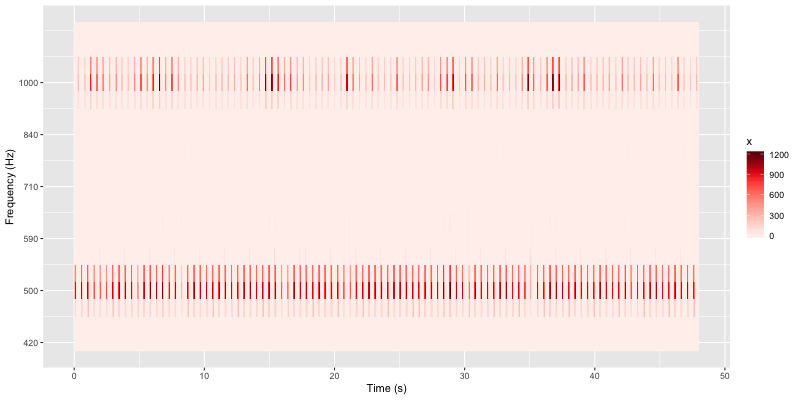

RObject{VecSxp}


In [20]:
rplot(result.primary_source)

In [21]:
cmask = uncompress(compress(result.primary_source));

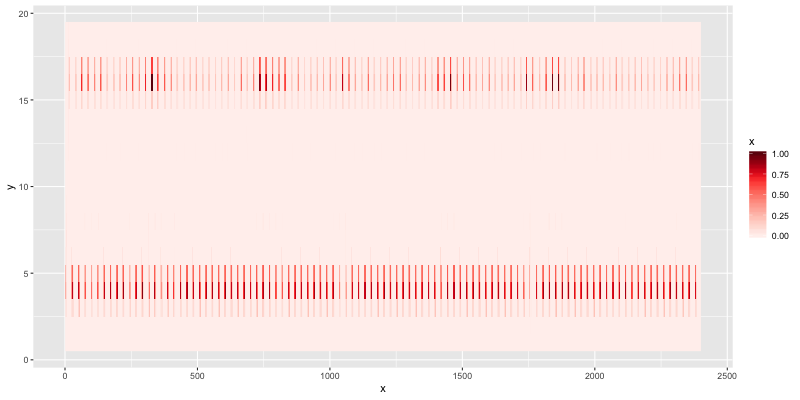

RObject{VecSxp}


In [22]:
ShammaModel.raster_plot(cmask)

In [23]:
comp = compress(result.primary_source)

AuditoryBistabilityLE.CompressedMask((2400, 19), UInt8[0x78, 0x9c, 0xed, 0x9d, 0x69, 0x54, 0x94, 0xd7, 0x19, 0xc7  …  0x94, 0xd4, 0x43, 0xae, 0xff, 0x01, 0xad, 0x78, 0xb2, 0x36])

In [24]:
sizeof(comp.data)

3363

In [25]:
length(comp.data)

3363

In [26]:
sizeof(result.primary_source.val.data)/sizeof(comp.data)

108.47457627118644

# Plans

I've verrified that this compression will lead to practical file sizes. So I can store the entire mask in my results allowing me to adjust how I evaluate the models after running the larger simulation.

I now need to verify that the computation of the ratio and the percepts remains essentially the same with this compression. Then I can start running test simulations with count_lengths.jl and run on MARCC by tomorrow (Wed 10/3).